/Users/susovanchatterjee/Documents/GitHub/Python-connections/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
01:14:15 - cmdstanpy - INFO - Chain [1] start processing


Data ready! We have 365 days of history.
             ds    y
360  2025-12-27  522
361  2025-12-28  528
362  2025-12-29  467
363  2025-12-30  470
364  2025-12-31  525


01:14:17 - cmdstanpy - INFO - Chain [1] done processing


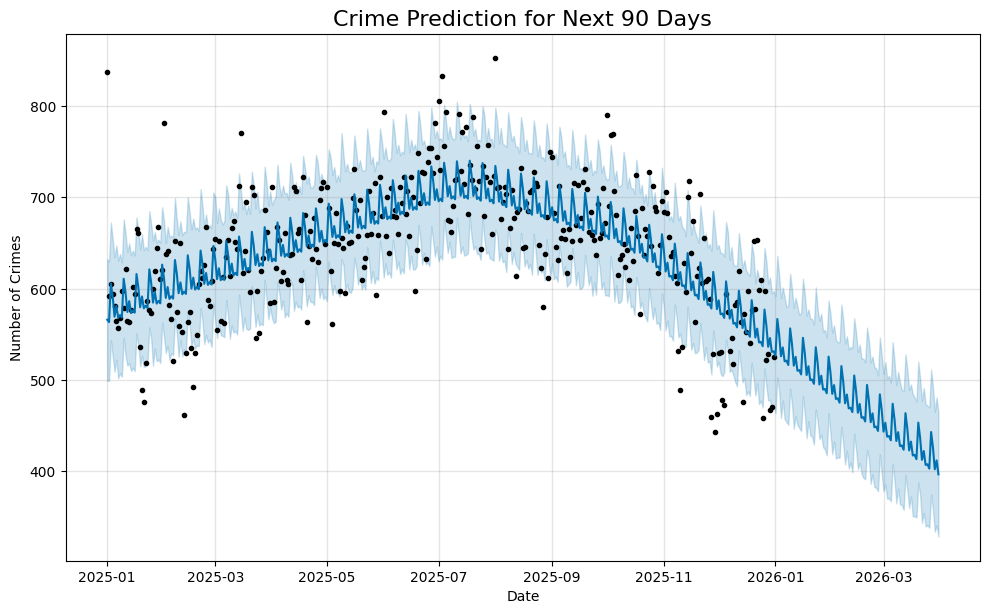

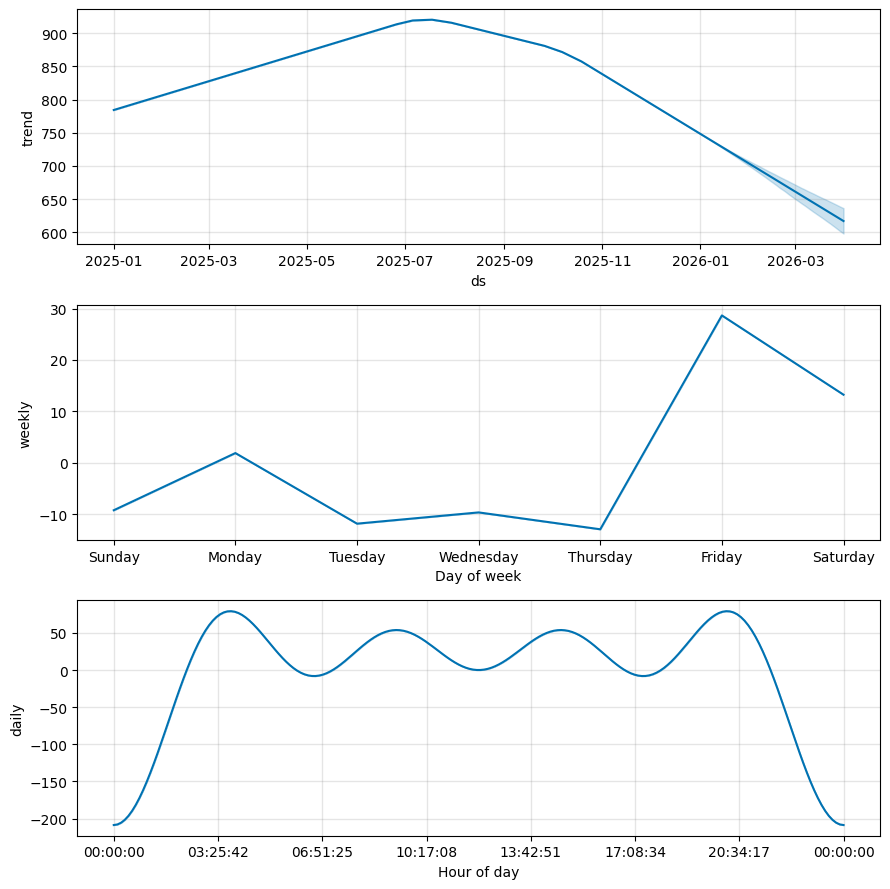

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load Cleaned Data
df = pd.read_csv('../data/cleaned_crime_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 2. Prepare Data for Prophet
# Prophet requires two specific columns: 'ds' (Date) and 'y' (Value)
# We count total crimes per day
daily_crime = df.groupby(df['Date'].dt.date).size().reset_index()
daily_crime.columns = ['ds', 'y']

print(f"Data ready! We have {len(daily_crime)} days of history.")
print(daily_crime.tail())

# 3. Train the Model (The Crystal Ball)
# We add 'daily_seasonality' because crime changes hour-to-hour
m = Prophet(daily_seasonality=True)
m.fit(daily_crime)

# 4. Make Future Predictions
# Create a placeholder for the next 90 days
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

# 5. Visualize the Future
# The black dots are real history. The Blue line is the prediction.
# The light blue shade is the "uncertainty zone".
fig1 = m.plot(forecast)
plt.title("Crime Prediction for Next 90 Days", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.show()

# 6. Visualize Components (Trends)
# This shows: Overall Trend (Up/Down), Weekly Pattern (Fri/Sat peaks)
fig2 = m.plot_components(forecast)
plt.show()